### Step 1: Load and Merge Data

We have three sheets:
- Sector info (symbol → sector)
- Stock prices from 2010–2020
- Stock prices from 2021–2024

Let’s load and merge these sheets into a single DataFrame.

In [3]:
import pandas as pd

pd.set_option('display.max_rows', 80000)

# excel load
excel_file = './stock_market_data.xlsx'

# read sheets
sector_df = pd.read_excel(excel_file, sheet_name='Sector')
prices_2010_2020 = pd.read_excel(excel_file, sheet_name='2010-2020')
prices_2021_2024 = pd.read_excel(excel_file, sheet_name='2021-2024')

# marge the two price dataframes
price_df = pd.concat([prices_2010_2020, prices_2021_2024], ignore_index=True)

# convert date column to datetime format
price_df['Date'] = pd.to_datetime(price_df['Date'])

# filter out 2010 and 2011 data due the bubble brust issue
# in 2011 2012 banking sector share lot was devided by 10
price_df = price_df[~price_df['Date'].dt.year.isin([2010, 2011])]


# Show preview
print(sector_df.head())
price_df.head(10)


       Symbol        Sector
0   1JANATAMF  MUTUAL FUNDS
1     1STBSRS  MUTUAL FUNDS
2      1STICB  MUTUAL FUNDS
3  1STPRIMFMF  MUTUAL FUNDS
4      2NDICB  MUTUAL FUNDS


,Date,Symbol,Open_Price,High_Price,Low_Price,Closing_Price,no_of_trade,Volume,Turnover
119570,2012-01-01,1JANATAMF,9.0,9.1,8.7,8.9,287.0,701000.0,6282000.0
119571,2012-01-01,1STBSRS,94.0,97.5,94.0,95.9,44.0,26500.0,2527000.0
119572,2012-01-01,1STPRIMFMF,22.0,23.8,21.7,22.8,348.0,558000.0,12701000.0
119573,2012-01-01,5THICB,155.1,155.1,155.1,155.1,1.0,100.0,16000.0
119574,2012-01-01,6THICB,48.3,48.4,47.2,47.7,41.0,13200.0,630000.0
119575,2012-01-01,7THICB,91.0,92.2,91.0,91.6,2.0,1000.0,92000.0
119576,2012-01-01,ABBANK,68.8,69.2,68.0,68.7,1113.0,409600.0,28041000.0
119577,2012-01-01,ACI,206.0,212.1,206.0,210.6,93.0,10000.0,2104000.0
119578,2012-01-01,ACIFORMULA,89.3,92.0,89.3,89.9,203.0,44600.0,4067000.0
119579,2012-01-01,ACIZCBOND,825.5,827.0,820.5,822.0,88.0,3044.0,2503000.0


### Step 2: Clean and Prepare the Data

Now we will:
- Convert the 'Date' column to datetime format  
- Merge with the sector info  
- Keep only 'Date', 'Sector', and 'Turnover'  
- Sort the data chronologically


In [15]:
# convert data to datetime format
price_df['Date'] = pd.to_datetime(price_df['Date'])

# marge the sector information with the price data
merged_df = pd.merge(price_df, sector_df, on='Symbol', how='left')

# drop unnecessary columns
clean_df = merged_df[['Date', 'Sector', 'Turnover']]

#debug sectoral data
# clean_df = merged_df[['Date','Symbol', 'Sector', 'Turnover']]

# Sort the data by Date
clean_df = clean_df.sort_values(by=['Date','Sector']).reset_index(drop=True)

# # show only treasury bond data
# clean_df = clean_df[clean_df['Sector'] == 'TRAVEL LEISURE']

clean_df.head(50)


,Date,Sector,Turnover
0,2012-01-01,BANK,28041000.0
1,2012-01-01,BANK,102236000.0
2,2012-01-01,BANK,15506000.0
3,2012-01-01,BANK,14792000.0
4,2012-01-01,BANK,92089000.0
5,2012-01-01,BANK,31387000.0
6,2012-01-01,BANK,40802000.0
7,2012-01-01,BANK,42442000.0
8,2012-01-01,BANK,36700000.0
9,2012-01-01,BANK,39974000.0


### Step 3: Feature Engineering - Add Time-Based Columns

We extract useful time-based features such as:
- Year
- Month
- Month Name
- Quarter

These will help in grouping sector performance seasonally or over time.


In [16]:
# Extract time-based features from the Date column
clean_df['Year'] = clean_df['Date'].dt.year
clean_df['Month'] = clean_df['Date'].dt.month
clean_df['Month_Name'] = clean_df['Date'].dt.month_name()
clean_df['Quarter'] = clean_df['Date'].dt.quarter

# Preview the updated DataFrame
clean_df.head(50)

,Date,Sector,Turnover,Year,Month,Month_Name,Quarter
0,2012-01-01,BANK,28041000.0,2012,1,January,1
1,2012-01-01,BANK,102236000.0,2012,1,January,1
2,2012-01-01,BANK,15506000.0,2012,1,January,1
3,2012-01-01,BANK,14792000.0,2012,1,January,1
4,2012-01-01,BANK,92089000.0,2012,1,January,1
5,2012-01-01,BANK,31387000.0,2012,1,January,1
6,2012-01-01,BANK,40802000.0,2012,1,January,1
7,2012-01-01,BANK,42442000.0,2012,1,January,1
8,2012-01-01,BANK,36700000.0,2012,1,January,1
9,2012-01-01,BANK,39974000.0,2012,1,January,1


### Step 4: Monthly Sector Aggregation

- We’ll group the cleaned data by `Sector+Month+Year`.
- Market behavior in `2010 ≠ 2020 ≠ 2024`. So for monthly aggregation `year` is a senstive feeature
- Events like COVID, political shifts, inflation, etc. affect different years uniquely.
- So basically grouping by month alone captures just `seasonality`. But adding year shows the `seasonal trends over time`.


In [23]:
# Group by Sector, Year, and Month to calculate average turnover
monthly_avg_df = clean_df.groupby(['Sector', 'Year', 'Month']).agg(
    Avg_Turnover=('Turnover', 'mean')
).reset_index()

# convert in million
monthly_avg_df['Avg_Turnover'] = monthly_avg_df['Avg_Turnover'] / 1_000_000

# rename the column
monthly_avg_df.rename(columns={'Avg_Turnover': 'Avg_Turnover(mn)'}, inplace=True)

# Optional: Sort for readability
monthly_avg_df = monthly_avg_df.sort_values(by=['Sector', 'Year', 'Month'])

# Preview
monthly_avg_df.head(20)

,Sector,Year,Month,Avg_Turnover(mn)
0,BANK,2012,1,29.301449
1,BANK,2012,2,27.479085
2,BANK,2012,3,24.293521
3,BANK,2012,4,36.505891
4,BANK,2012,5,20.069584
5,BANK,2012,6,11.547918
6,BANK,2012,7,9.631227
7,BANK,2012,8,13.852245
8,BANK,2012,9,34.792362
9,BANK,2012,10,22.102721


### Step 5: Visualize Sectoral Performance with a Heatmap

In this step, we create a heatmap to visualize how different sectors have performed over time.

**Purpose:**
- To identify seasonal patterns and trends in sector performance.
- To observe how each sector's average turnover changes across months and years.

**How it works:**
- We group the data by `Sector`, `Year`, and `Month`.
- We calculate the average turnover for each combination.
- We reshape the data using a pivot table to prepare it for a heatmap.
- We plot the heatmap using Seaborn for visual insight.

This gives us a powerful tool to spot sectoral momentum, seasonal booms, and consistent performers.



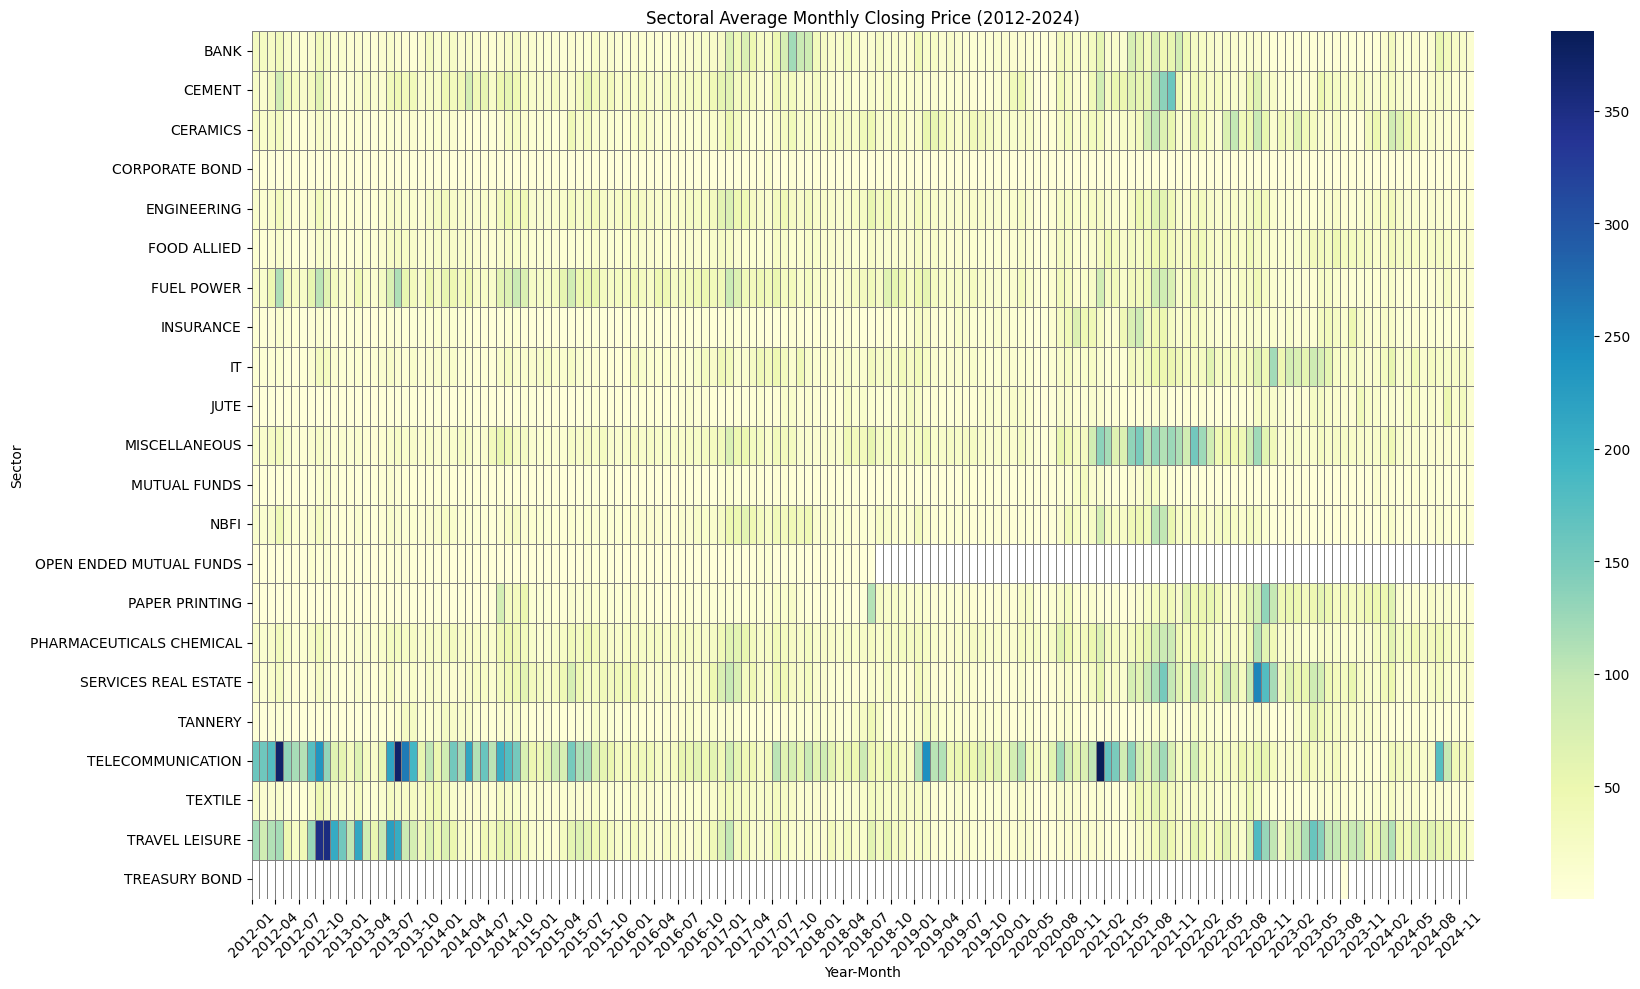

YearMonth,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Sector,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BANK,29.301449,27.479085,24.293521,36.505891,20.069584,11.547918,9.631227,13.852245,34.792362,22.102721,9.976990,13.366130,8.041601,11.724868,8.041785,5.506370,10.667451,15.136456,10.471535,6.302738,4.920181,9.420514,28.484642,12.781425,20.955346,22.469761,10.932003,17.158139,10.586629,9.539352,6.156361,10.823652,18.820341,24.819275,11.877278,10.806450,7.735075,8.069413,8.494678,5.736761,11.946169,8.778949,8.517786,18.041040,10.572827,14.365292,8.545782,8.454330,11.758013,10.424265,7.845364,7.513758,7.489134,7.794921,14.803908,11.515381,16.480333,18.510683,19.731882,24.839661,71.707774,40.195618,73.535365,45.934184,25.025096,22.718127,47.615418,75.648730,121.876846,91.951745,88.102992,34.749537,24.870809,20.482335,15.464886,29.537763,15.989681,11.466733,12.593909,25.301089,12.765695,15.207645,10.636943,10.522080,41.716730,17.694456,23.630144,11.021305,18.766627,12.239445,8.112406,8.205835,7.871160,8.039635,12.792730,11.820550,11.243039,11.713130,8.376437,4.001103,2.772496,5.265633,32.768423,27.573425,15.205938,18.462632,29.965008,59.457038,14.910342,17.887942,12.571650,76.023254,59.363307,35.354911,75.838718,44.989907,55.967250,84.193923,44.624325,26.109143,23.767579,18.595479,12.515589,17.529649,13.291621,8.394759,12.420145,11.486644,4.426210,4.049139,1.398912,2.250130,1.823567,1.785900,3.430782,5.438223,2.360523,4.776780,2.657406,1.907235,1.349421,1.010481,3.017857,13.971140,32.726025,10.394661,8.972057,11.034648,7.158087,12.790121,52.733990,35.833910,21.928242,19.377819,11.249441
CEMENT,22.341462,13.967105,30.859126,83.540500,37.504508,28.171269,18.097349,30.573464,63.243119,22.466368,10.043261,5.801496,8.629312,14.451553,21.252413,13.186469,11.759168,36.425521,44.460266,35.433257,38.656266,14.092024,22.080884,19.899921,44.070388,34.431771,41.076230,80.017185,40.269244,57.279235,19.674639,49.032650,58.553753,44.735328,23.670043,15.083593,17.370479,15.603721,26.557115,13.106304,16.456511,28.497653,53.193754,33.231993,26.526095,34.199640,16.950105,24.279156,16.191565,27.503807,15.886884,13.247076,25.944255,22.708279,19.286563,25.745313,28.138353,22.280557,41.042770,57.412233,63.308512,31.543722,31.875233,24.402747,11.566960,9.965440,41.400098,24.106714,30.567674,16.199649,19.422107,26.883902,17.720988,11.819226,7.514093,15.074890,6.680717,8.424136,17.088857,9.674389,24.962221,15.039481,9.701419,9.364984,13.568453,8.898632,10.551008,6.725171,6.702993,6.233928,4.552660,5.064454,2.338710,3.349536,8.292550,10.651625,37.103173,44.370350,15.840016,1.264400,0.334568,2.966176,38.339669,24.686333,11.022744,7.076041,38.832117,85.081576,27.577732,52.64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 200)

# create a new column combining Year and Month for better labels
monthly_avg_df['YearMonth'] = monthly_avg_df['Year'].astype(str) + '-' + monthly_avg_df['Month'].astype(str).str.zfill(2)

# pivot table to create a heatmap
heatmap_df = monthly_avg_df.pivot(index='Sector', columns='YearMonth', values='Avg_Turnover(mn)')

# plot the heatmap
plt.figure(figsize=(18, 10))
ax = sns.heatmap(heatmap_df, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Sectoral Average Monthly Closing Price (2012-2024)")
plt.xlabel("Year-Month")
plt.ylabel("Sector")

# 3 month intervals tick labels in x-axis
xticks = heatmap_df.columns.tolist()
tick_positions = np.arange(len(xticks))
every_2nd = tick_positions[::3]
every_2nd_labels = [xticks[i] for i in every_2nd]
plt.xticks(ticks=every_2nd, labels=every_2nd_labels, rotation=45)

plt.tight_layout()
plt.show()


# show pivot table
heatmap_df.head(22)



### Step 6: Forecasting Sectoral Trends with Facebook Prophet

In this step, we forecast the average monthly closing prices for each sector using **Facebook Prophet**, a time-series forecasting library built for simplicity and interpretability.

#### Objective:
To **predict future monthly average closing prices** for sectors based on historical seasonal patterns.

#### Steps:
1. **Install and Import Prophet**:
   Install using `pip3 install prophet` and import using `from prophet import Prophet`.

2. **Filter Sector Data**:
   prophet always accept dataframe with two columns `ds`, `y`
   - `ds`: Date column (first day of each month)
   - `y`: Target variable (average closing price)

3. **Train the Prophet Model**:
   Fit the Prophet model on the sector’s historical data.

4. **Make Future Predictions**:
   Generate future dates and predict values for upcoming months (e.g., next 12 months).

5. **Plot the Forecast**:
   Visualize the trend, seasonalities, and future predictions using Prophet’s built-in plotting.

#### Note: 
Repeat the same process for each sector to compare future trends and rank sectors based on predicted performance.



In [27]:
from prophet import Prophet

In [94]:
# Filter data for BANK sector
bank_df = monthly_avg_df[monthly_avg_df['Sector'] == 'JUTE'][['Year', 'Month', 'Avg_Turnover(mn)']].copy()

# Create a 'ds' column with first day of each month
bank_df['ds'] = pd.to_datetime(bank_df['Year'].astype(str) + '-' + bank_df['Month'].astype(str) + '-01')
bank_df['y'] = bank_df['Avg_Turnover(mn)']

# Keep only the required columns
prophet_df = bank_df[['ds', 'y']]


In [95]:
model = Prophet()
model.fit(prophet_df)

21:14:31 - cmdstanpy - INFO - Chain [1] start processing
21:14:31 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
future = model.make_future_dataframe(periods=12, freq='ME')

In [97]:
forecast = model.predict(future)

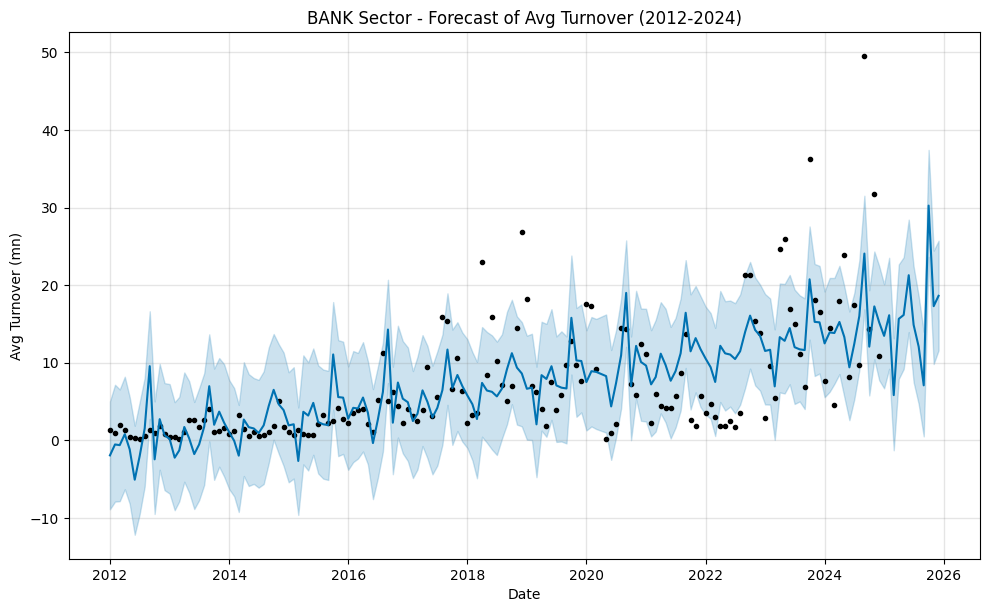

In [98]:
# Plot the forecast
model.plot(forecast)
plt.title("BANK Sector - Forecast of Avg Turnover (2012-2024)")
plt.xlabel("Date")
plt.ylabel("Avg Turnover (mn)")
plt.show()


20:33:34 - cmdstanpy - INFO - Chain [1] start processing
20:34:28 - cmdstanpy - INFO - Chain [1] done processing
20:34:30 - cmdstanpy - INFO - Chain [1] start processing
20:34:37 - cmdstanpy - INFO - Chain [1] done processing
20:34:38 - cmdstanpy - INFO - Chain [1] start processing
20:34:42 - cmdstanpy - INFO - Chain [1] done processing
20:34:43 - cmdstanpy - INFO - Chain [1] start processing
20:34:43 - cmdstanpy - INFO - Chain [1] done processing
20:34:50 - cmdstanpy - INFO - Chain [1] start processing
20:35:48 - cmdstanpy - INFO - Chain [1] done processing
20:35:52 - cmdstanpy - INFO - Chain [1] start processing
20:36:15 - cmdstanpy - INFO - Chain [1] done processing
20:36:19 - cmdstanpy - INFO - Chain [1] start processing
20:36:42 - cmdstanpy - INFO - Chain [1] done processing
20:36:52 - cmdstanpy - INFO - Chain [1] start processing
20:38:39 - cmdstanpy - INFO - Chain [1] done processing
20:38:42 - cmdstanpy - INFO - Chain [1] start processing
20:38:53 - cmdstanpy - INFO - Chain [1]

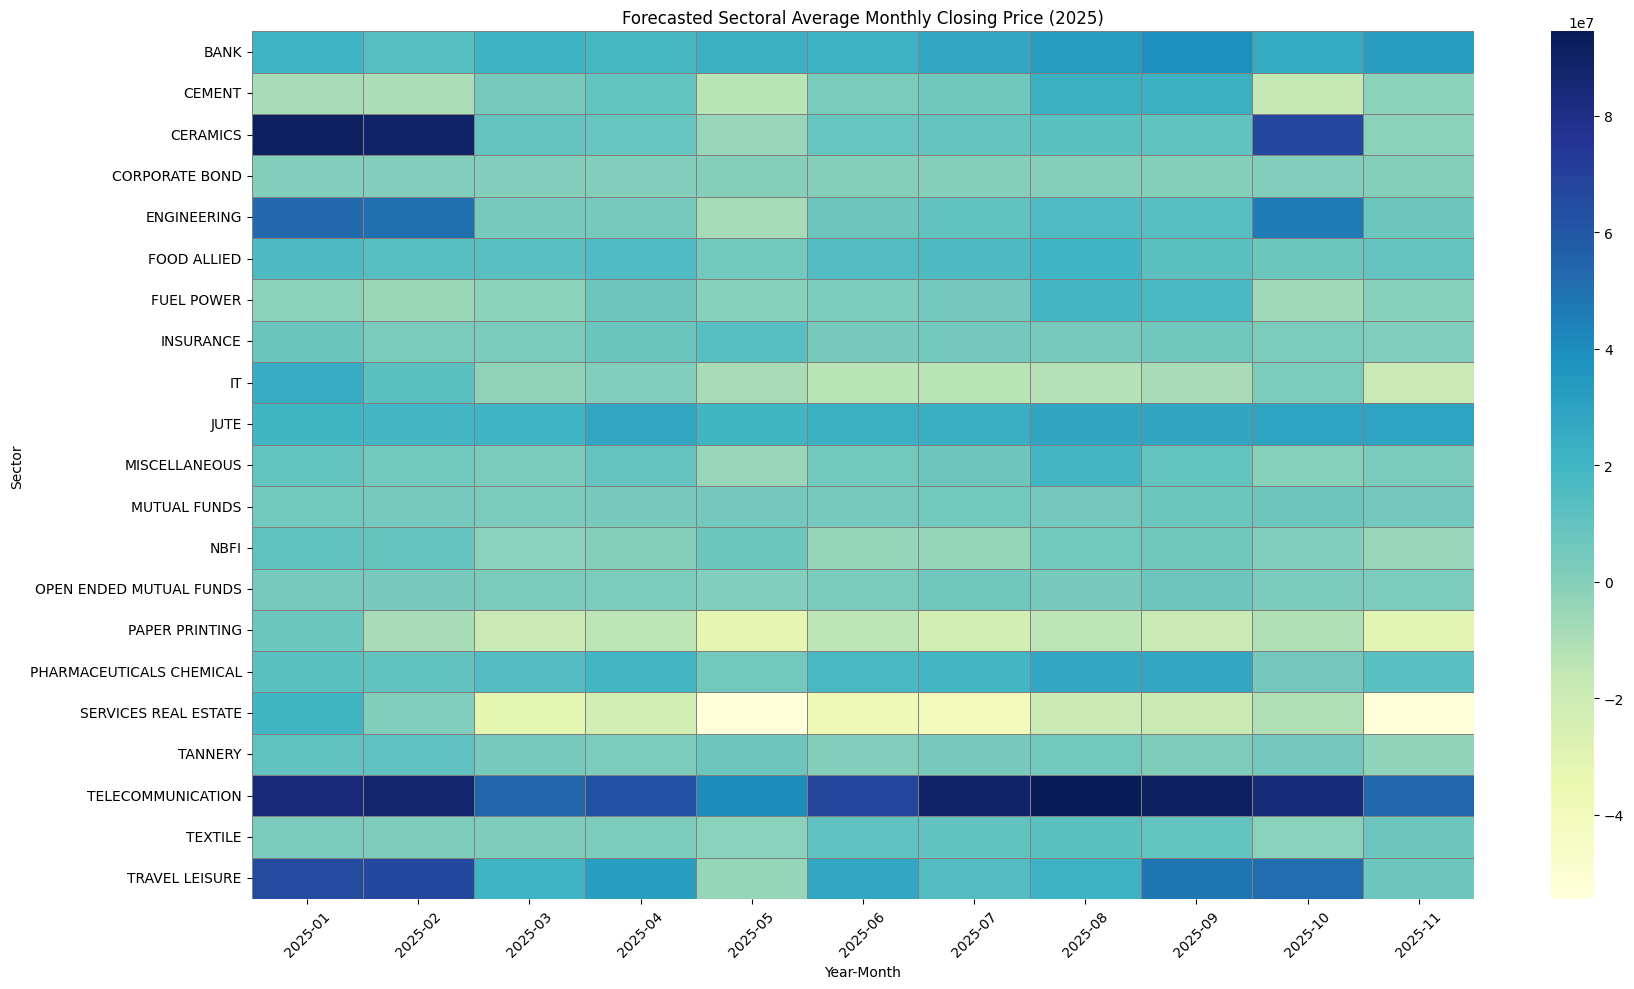

YearMonth,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
Sector,,,,,,,,,,,
BANK,2.110830e+07,1.393220e+07,2.145890e+07,1.852562e+07,2.327037e+07,2.204722e+07,2.753389e+07,3.327116e+07,3.906902e+07,2.642750e+07,3.231063e+07
CEMENT,-8.777192e+06,-9.906452e+06,4.752909e+06,9.586255e+06,-1.355675e+07,2.952465e+06,6.626394e+06,2.302852e+07,2.318787e+07,-1.635358e+07,-1.765624e+06
CERAMICS,9.142238e+07,8.878302e+07,9.191321e+06,8.580839e+06,-4.738820e+06,8.533576e+06,9.269336e+06,1.205038e+07,1.052538e+07,6.717922e+07,-1.974684e+06
CORPORATE BOND,4.161337e+05,4.550385e+05,2.813244e+05,3.172704e+05,-1.565376e+05,2.462696e+05,-1.626646e+05,1.571913e+04,-5.306720e+04,3.603344e+05,1.490635e+05
ENGINEERING,5.272414e+07,5.086057e+07,4.478247e+06,4.497051e+06,-7.984847e+06,7.194886e+06,1.052139e+07,1.579705e+07,1.343646e+07,4.674766e+07,7.041250e+06
FOOD ALLIED,1.610872e+07,1.359323e+07,1.257530e+07,1.565291e+07,5.678993e+06,1.532245e+07,1.606276e+07,2.085158e+07,1.170109e+07,7.339084e+06,9.372691e+06
FUEL POWER,-1.647988e+06,-5.365008e+06,-1.826076e+06,7.109550e+06,-5.689529e+05,2.045051e+06,5.174419e+06,1.998168e+07,1.717668e+07,-7.135179e+06,-5.005723e+05
INSURANCE,8.090463e+06,2.939860e+06,3.152619e+06,8.130168e+06,1.325012e+07,3.629504e+06,5.008252e+06,4.401855e+06,6.313103e+06,2.151355e+06,1.043028e+06
IT,2.509402e+07,1.142103e+07,-2.642864e+06,8.358544e+05,-8.894456e+06,-1.320306e+07,-1.324444e+07,-1.212507e+07,-8.831828e+06,2.204090e+06,-1.802593e+07


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

# Optional: display more columns
pd.set_option('display.max_columns', 200)

# Create an empty list to store forecasts
forecasts = []

# Loop through each sector and forecast
for sector in clean_df['Sector'].unique():
    # Filter data for the current sector
    sector_data = clean_df[clean_df['Sector'] == sector]
    
    # Prepare the data for Prophet (ds: date, y: closing price)
    sector_data_prophet = sector_data[['Date', 'Turnover']].rename(columns={'Date': 'ds', 'Turnover': 'y'})
    
    # Skip sectors with less than 2 valid data points
    if sector_data_prophet['y'].notna().sum() < 2:
        continue

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(sector_data_prophet)
    
    # Make future predictions (for 12 months of 2025)
    future = model.make_future_dataframe(periods=12, freq='ME')  # Use 'ME' for month end
    forecast = model.predict(future)
    
    # Add sector name to the forecast
    forecast['Sector'] = sector
    
    # Append forecast to the list
    forecasts.append(forecast[['ds', 'yhat', 'Sector']])

# Combine all the forecasts
all_forecasts = pd.concat(forecasts)

# Create a new column combining Year and Month for better visualization
all_forecasts['YearMonth'] = all_forecasts['ds'].dt.year.astype(str) + '-' + all_forecasts['ds'].dt.month.astype(str).str.zfill(2)

# Filter only 2025 predictions
all_forecasts_2025 = all_forecasts[all_forecasts['ds'].dt.year == 2025]




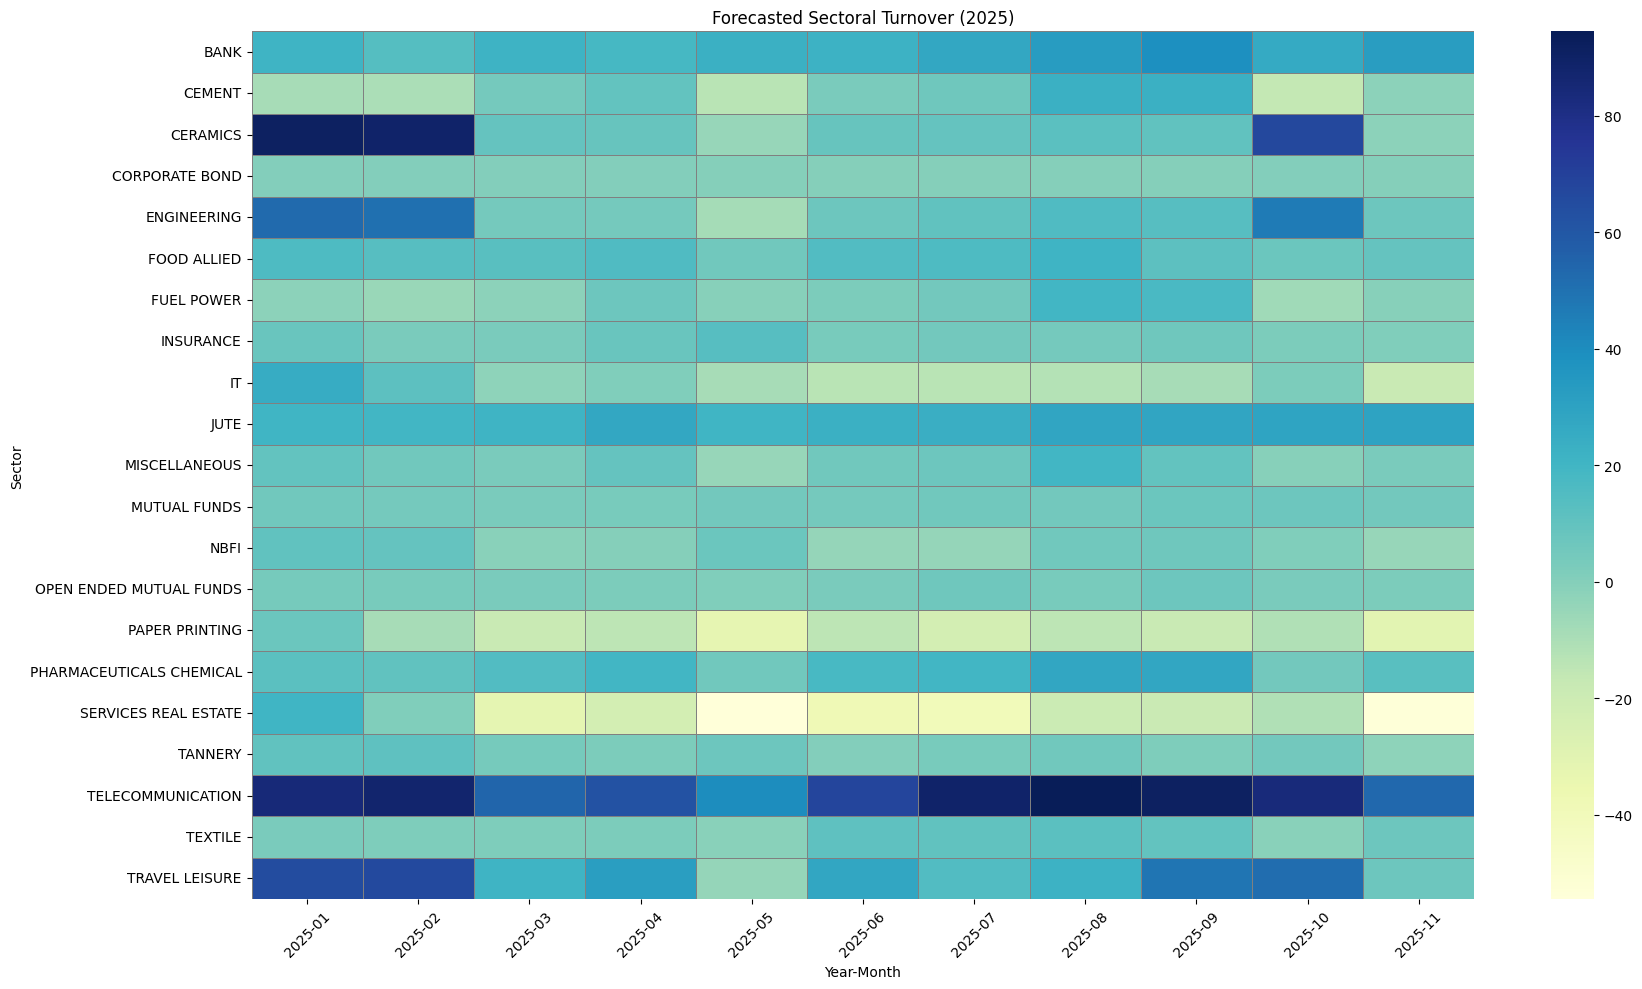

YearMonth,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11
Sector,,,,,,,,,,,
BANK,21.108298,13.932196,21.458898,18.525620,23.270370,22.047217,27.533885,33.271160,39.069017,26.427503,32.310628
CEMENT,-8.777192,-9.906452,4.752909,9.586255,-13.556752,2.952465,6.626394,23.028524,23.187872,-16.353578,-1.765624
CERAMICS,91.422382,88.783017,9.191321,8.580839,-4.738820,8.533576,9.269336,12.050377,10.525380,67.179222,-1.974684
CORPORATE BOND,0.416134,0.455038,0.281324,0.317270,-0.156538,0.246270,-0.162665,0.015719,-0.053067,0.360334,0.149064
ENGINEERING,52.724135,50.860569,4.478247,4.497051,-7.984847,7.194886,10.521392,15.797054,13.436459,46.747662,7.041250
FOOD ALLIED,16.108717,13.593233,12.575297,15.652906,5.678993,15.322446,16.062757,20.851584,11.701092,7.339084,9.372691
FUEL POWER,-1.647988,-5.365008,-1.826076,7.109550,-0.568953,2.045051,5.174419,19.981678,17.176679,-7.135179,-0.500572
INSURANCE,8.090463,2.939860,3.152619,8.130168,13.250119,3.629504,5.008252,4.401855,6.313103,2.151355,1.043028
IT,25.094024,11.421031,-2.642864,0.835854,-8.894456,-13.203062,-13.244445,-12.125066,-8.831828,2.204090,-18.025934


In [69]:
# Pivot the results for a clearer comparison
forecast_pivot = all_forecasts_2025.pivot(index='Sector', columns='YearMonth', values='yhat')

# yhat in million
forecast_pivot = forecast_pivot / 1_000_000

# # Replace NaN values with 0
# forecast_pivot = forecast_pivot.fillna(0)

# Plot the heatmap for forecasts
plt.figure(figsize=(18, 10))
sns.heatmap(forecast_pivot, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Forecasted Sectoral Turnover (2025)")
plt.xlabel("Year-Month")
plt.ylabel("Sector")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# Show the forecast pivot table
forecast_pivot.head(22)

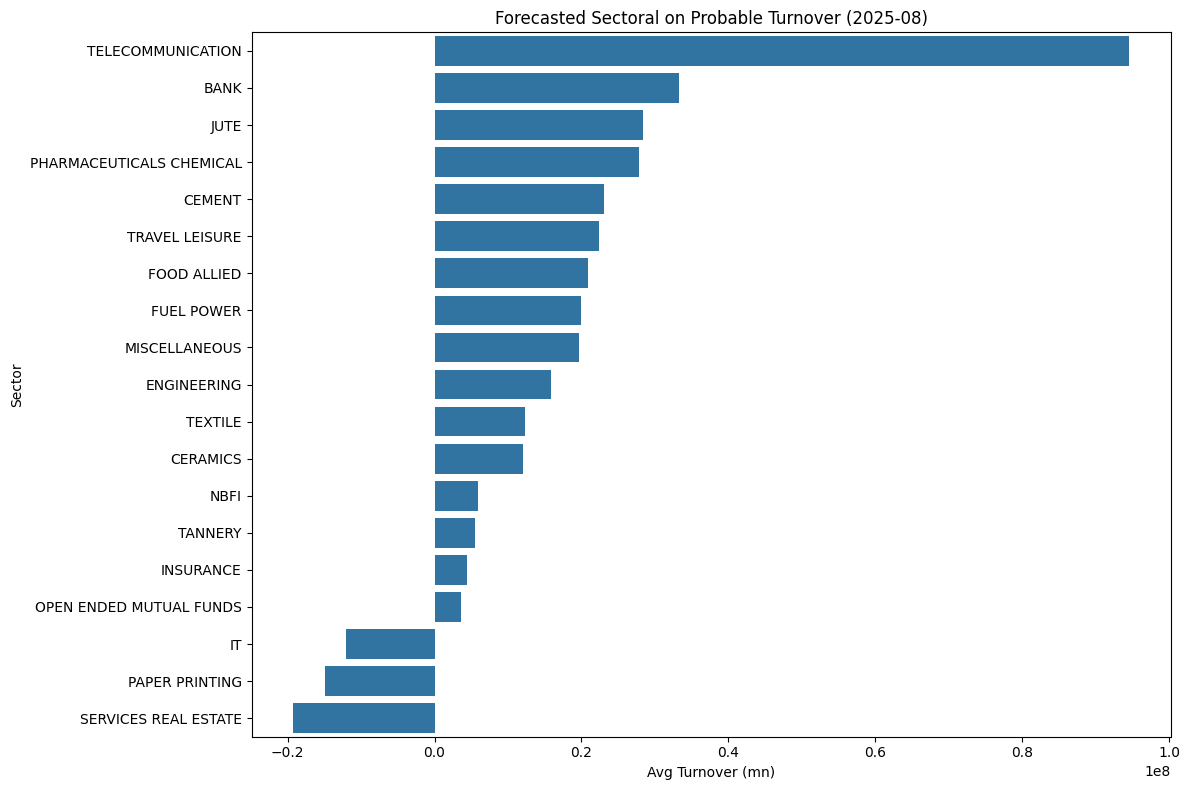

In [102]:
# Filter data for 2025-01 and exclude specific sectors
excluded_sectors = ['CORPORATE BOND', 'TREASURY BOND', 'MUTUAL FUNDS']
filtered_df = all_forecasts_2025[(all_forecasts_2025['YearMonth'] == '2025-08') & (~all_forecasts_2025['Sector'].isin(excluded_sectors))]

# Sort by forecasted value
filtered_df = filtered_df.sort_values(by='yhat', ascending=False)

# Plot horizontal bar to show the ranking of the sectors for 2025-01
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_df, y='Sector', x='yhat')
plt.title("Forecasted Sectoral on Probable Turnover (2025-08)")
plt.xlabel("Avg Turnover (mn)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()